Hide the box around graphs
------------------------

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use({'axes.spines.top': False, 'axes.spines.right': False})

Bar Graphs
---------

Here is a sample [bar graph](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar) in matplotlib

We'll start by creating some mock data

In [2]:
xvalues = np.arange(4) + 0.5
data = np.arange(1, 5)
sem = [np.zeros(4), 0.5 * np.ones(4)]
labels = ['A', 'B', 'C', 'D']

And now the plot. Note that there are only upper bounds on the error bars because zeros were passed for the lower values by defining sem as a list with two sets of values.

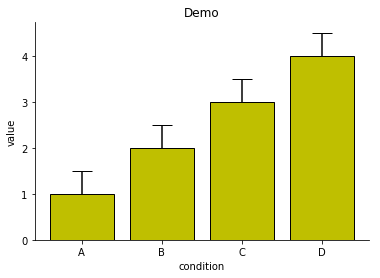

In [3]:
plt.bar(xvalues, data, yerr=sem, tick_label=labels,
        color='y', edgecolor='k', capsize=10)
plt.xlabel('condition')
plt.ylabel('value')
plt.title('Demo')
plt.show()